This is a project to analyze Star Trek characters, actors and series.  I focused on the main and recurring characters in The Original Series, Next Generation, Deep Space 9, Voyager and Enterprise.

Step 1: Tables were scraped from Wikipedia using Pandas.
Step 2: Clean the data with Pandas.
    Challenge 1: Wikipedia included data for multiple series and seasons in one row across multiple columns.
        Process: ChatGPT and I went back and forth for a while trying to get the correct code.  I left a couple of the debugging cells we used to find the problem and resolve the problems we encountered in case they are of interest.  
        Result: We finally got the first round of separating out the 'Appearance' column into 'Series' and 'Seasons', along with the appropriate values in 'Rank', 'Posting', and 'Position' for each resulting new row.
    Challenge 2: The 'Rank', 'Posting', and 'Position' columns were far more tangled with seasons indicated in a different syntax and different ranges than the 'Appearances' column.  I ultimately decided manually cleaning this up was best, especially since some research was involved to fully understand what was indicated in these columns.  This was also the easiest way to remove character appearances in films an show that were out of scope.  While I had earlier removed much of this with pandas by deleting rows based on 'Series'.  I still had these references in these other three columns.
        Process:  Used Excel to clean, employing text to columns, and truncating unneeded columns.  Where research was done, I primarily stuck with Wikipedia to see the rank, location and position of each character for the parsed rows in the previous step.  I ultimately added many more rows to capture as much detail as possible.
        Result:  Excel table with a separate row to show each character, series, season, rank, posting and position combination.



Funny Thing:  While getting some assistance with the python code for data cleaning, ChatGPT guessed that I might have a column named "Starship", which I didn't and had only previously mentioned a few relatively generic column names and some values, like (TNG), (DS9).  I mentioned this and asked if it new what dataset I was working with.  It correctly guessed Star Trek.  I congratulated it.  Along with the usual feedback paragraph, it returned the "Live long and prosper" emoji.  ChatGPT, my new best friend at work!!

In [60]:
# First we get the info from Wikipedia
import pandas as pd

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_Star_Trek_characters#Main_and_recurring_characters'

# Read all tables from the page
tables = pd.read_html(url)

# Display the number of tables found
print(f"Number of tables found: {len(tables)}")

# Display the first table as an example
print(tables[0])

Number of tables found: 17
   Abbreviation                                        Title       Date(s)  \
0            TC  "The Cage" (Star Trek: The Original Series)          1966   
1           TOS               Star Trek: The Original Series     1966–1969   
2           TAS               Star Trek: The Animated Series     1973–1974   
3           TMP                Star Trek: The Motion Picture          1979   
4          TWOK              Star Trek II: The Wrath of Khan          1982   
5          TSFS          Star Trek III: The Search for Spock          1984   
6           TVH                Star Trek IV: The Voyage Home          1986   
7           TFF              Star Trek V: The Final Frontier          1989   
8           TUC       Star Trek VI: The Undiscovered Country          1991   
9           TNG               Star Trek: The Next Generation     1987–1994   
10          DS9                   Star Trek: Deep Space Nine     1993–1999   
11          GEN                      

In [119]:
# We save the primary table as df

df = pd.DataFrame(tables[1])
df.info


<bound method DataFrame.info of            Character              Actor(s)            Appearances  \
0             Airiam           Sara Mitich      Seasons 1–2 (DSC)   
1             Airiam       Hannah Cheesman      Seasons 1–2 (DSC)   
2    Jonathan Archer          Scott Bakula      Seasons 1–4 (ENT)   
3          Soji Asha           Isa Briones      Seasons 1-2 (PIC)   
4              Ayala           Tarik Ergin      Seasons 1–7 (VOY)   
..               ...                   ...                    ...   
262        Tasha Yar         Denise Crosby    Seasons 1,3,7 (TNG)   
263     Kasidy Yates  Penny Johnson Jerald      Seasons 3–7 (DS9)   
264              Zek         Wallace Shawn  Seasons 1–3,5–7 (DS9)   
265             Zero           Angus Imrie         Season 1 (PRO)   
266           Zhaban         Jamie McShane         Season 1 (PIC)   

                             Rank                         Posting  \
0                   Lt. Commander                   USS Discovery   
1

In [121]:
# Do a bit of cleaning

# Remove any white space
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Get column names
df.columns
df.head()

,Character,Actor(s),Appearances,Rank,Posting,Position,Species
0,Airiam,Sara Mitich,Seasons 1–2 (DSC),Lt. Commander,USS Discovery,Science officer,Human cyborg
1,Airiam,Hannah Cheesman,Seasons 1–2 (DSC),Lt. Commander,USS Discovery,Science officer,Human cyborg
2,Jonathan Archer,Scott Bakula,Seasons 1–4 (ENT),Captain,Enterprise NX-01,Commanding officer,Human
3,Soji Asha,Isa Briones,Seasons 1-2 (PIC),Civilian,Romulan Reclamation Site,Anthropologist,Android
4,Ayala,Tarik Ergin,Seasons 1–7 (VOY),"Lieutenant, JG (provisional)",USS Voyager,Helmsman (S7) Security officer (S1-7) Maquis (...,Human


In [96]:
'''This code was used for debugging to correct an issue that was identified with the way the new df was being written.

# Function to extract the part of the text corresponding to a given series.
def extract_corresponding_part(text, series):
    segments = str(text).split(') ') if not pd.isna(text) else []
    for segment in segments:
        if f'({series})' in segment:
            return segment.split(f'({series})')[0].strip()
    return ''

# Function to create new rows for each character according to the series they appeared in.
def expand_appearances(row):
    appearances = str(row['Appearances']) if not pd.isna(row['Appearances']) else ''
    expanded_rows = []

    segments = appearances.split(') ')

    for segment in segments:
        if '(' in segment:
            appearance_part, series_part = segment.split('(', 1)
            appearance_part = appearance_part.strip()
            series_part = series_part.strip(')')
        else:
            appearance_part = segment.strip()
            series_part = ''

        if series_part:
            # Create a dictionary for each new row
            new_row = {
                'Character': row['Character'],   # Copying Column
                'Actor(s)': row['Actor(s)'],     # Copying Column
                'Appearances': appearance_part,
                'Series': series_part,
                'Species': row['Species'],       # Copying Column
            }
            expanded_rows.append(new_row)

    # Debugging: Check what expanded_rows contains
    print("Expanded Rows:")
    for r in expanded_rows:
        print(r)

    # If no series reference is found, return the original row as a single-row DataFrame
    if not expanded_rows:
        return pd.DataFrame([row])

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(expanded_rows)

# Apply the function to the entire DataFrame and concatenate the results <-corrected code
expanded_df = pd.concat([expand_appearances(row) for _, row in df.iterrows()], ignore_index=True)

# Display the expanded DataFrame
print(expanded_df)
'''

Expanded Rows:
{'Character': 'Airiam', 'Actor(s)': 'Sara Mitich', 'Appearances': 'Seasons 1–2', 'Series': 'DSC', 'Species': 'Human cyborg'}
Expanded Rows:
{'Character': 'Airiam', 'Actor(s)': 'Hannah Cheesman', 'Appearances': 'Seasons 1–2', 'Series': 'DSC', 'Species': 'Human cyborg'}
Expanded Rows:
{'Character': 'Jonathan Archer', 'Actor(s)': 'Scott Bakula', 'Appearances': 'Seasons 1–4', 'Series': 'ENT', 'Species': 'Human'}
Expanded Rows:
{'Character': 'Soji Asha', 'Actor(s)': 'Isa Briones', 'Appearances': 'Seasons 1-2', 'Series': 'PIC', 'Species': 'Android'}
Expanded Rows:
{'Character': 'Ayala', 'Actor(s)': 'Tarik Ergin', 'Appearances': 'Seasons 1–7', 'Series': 'VOY', 'Species': 'Human'}
Expanded Rows:
{'Character': 'Azan', 'Actor(s)': 'Kurt Wetherill', 'Appearances': 'Seasons 6–7', 'Series': 'VOY', 'Species': 'Wysanti/xB'}
Expanded Rows:
{'Character': 'Reginald Barclay', 'Actor(s)': 'Dwight Schultz', 'Appearances': 'Seasons 3–4,6–7', 'Series': 'TNG', 'Species': 'Human'}
{'Character': 

In [104]:
'''#Debugging to get the rank, posting, and position columns working correctly

def extract_corresponding_part(text, series):
    # Handle the case where the text might be NaN
    segments = str(text).split(')') if not pd.isna(text) else []
    
    # Debugging: Print segments and series being searched for
    print(f"Text: {text}")
    print(f"Segments: {segments}")
    print(f"Series: {series}")
    
    for segment in segments:
        # Reattach the closing parenthesis and strip leading/trailing whitespace <- code correction
        segment = segment.strip() + ')'
        print(f"Checking Segment: {segment}")
        
        if f'({series})' in segment:
            result = segment.split(f'({series})')[0].strip()
            print(f"Found: {result}")
            return result
    
    # If the series is not found, return the original text
    print(f"Series not found, returning original text: {text}")
    return text.strip()

# Example usage (replace with actual DataFrame values)
text_example = "Lieutenant (TNG) Captain (FCT) Commander (VOY)"
series_example = "TNG"
print(extract_corresponding_part(text_example, series_example))
'''

Text: Lieutenant (TNG) Captain (FCT) Commander (VOY)
Segments: ['Lieutenant (TNG', ' Captain (FCT', ' Commander (VOY', '']
Series: TNG
Checking Segment: Lieutenant (TNG)
Found: Lieutenant
Lieutenant


In [141]:
# Identified a secondary issue where multiple seasons were listed within one set of parentheses, 
# which caused the function above to not work as expected.  

import re

def separate_series(text):
    # Ensure the text is a string; handle NaN or non-string input gracefully
    if pd.isna(text):
        return text  # If NaN, return as is (or return an empty string if preferred)
    
    text = str(text)
    
    def replace_match(m):
        # Capture the preceding value and the series inside parentheses
        preceding_value = m.group(1).strip()
        series_list = [f'{preceding_value} ({series.strip()}) ' for series in m.group(2).split(',')]
        return ' '.join(series_list)
    
    # Modify the pattern to capture preceding value and series inside parentheses
    return re.sub(r'([^()]+)\(([^)]+)\)', replace_match, text)

# Apply this to the relevant columns
df['Appearances'] = df['Appearances'].apply(separate_series)
df['Rank'] = df['Rank'].apply(separate_series)
df['Posting'] = df['Posting'].apply(separate_series)
df['Position'] = df['Position'].apply(separate_series)

# Display the first 30 rows of the DataFrame
print(df.head(30))



                        Character                   Actor(s)  \
0                          Airiam                Sara Mitich   
1                          Airiam            Hannah Cheesman   
2                 Jonathan Archer               Scott Bakula   
3                       Soji Asha                Isa Briones   
4                           Ayala                Tarik Ergin   
5                            Azan             Kurt Wetherill   
6                Reginald Barclay             Dwight Schultz   
7                    Bareil Antos              Philip Anglim   
8                   Julian Bashir           Alexander Siddig   
9                          B'Etor              Gwynyth Walsh   
10                   Brad Boimler                 Jack Quaid   
11      Cleveland "Book" Booker V                David Ajala   
12                        Boothby                Ray Walston   
13                     Borg Queen                Alice Krige   
14                     Borg Queen       

In [149]:
# Code to separate out the different series info that is combined into the values.

# Function to extract the part of the text corresponding to a given series.
def extract_corresponding_part(text, series):
    segments = str(text).split(') ') if not pd.isna(text) else []
    for segment in segments:
        # Reattach the closing parenthesis and strip leading/trailing whitespace 
        segment = segment.strip() + ')'
                
        if f'({series})' in segment:
            result = segment.split(f'({series})')[0].strip()
            return result
    
    # If the series is not found, return the original text
    return text.strip()

# Function to create new rows for each character according to the series they appeared in.
def expand_appearances(row):
    appearances = str(row['Appearances']) if not pd.isna(row['Appearances']) else ''
    rank = str(row['Rank']) if not pd.isna(row['Rank']) else ''
    posting = str(row['Posting']) if not pd.isna(row['Posting']) else ''
    position = str(row['Position']) if not pd.isna(row['Position']) else ''
    
    segments = appearances.split(') ')
    expanded_rows = []

    for segment in segments:
        if '(' in segment:
            appearance_part, series_part = segment.split('(', 1)
            appearance_part = appearance_part.strip()
            series_part = series_part.strip(')')
        else:
            appearance_part = segment.strip()
            series_part = ''

        rank_part = extract_corresponding_part(rank, series_part)
        posting_part = extract_corresponding_part(posting, series_part)
        position_part = extract_corresponding_part(position, series_part)

        if series_part:
            # Create a dictionary for each new row
            new_row = {
                'Character': row['Character'],   # Copying Column
                'Actor(s)': row['Actor(s)'],     # Copying Column
                'Appearances': appearance_part,
                'Series': series_part,
                'Rank': rank_part,
                'Posting': posting_part,
                'Position': position_part,
                'Species': row['Species'],       # Copying Column
            }
            expanded_rows.append(new_row)

    # If no series reference is found, return the original row as a single-row DataFrame
    if not expanded_rows:
        return pd.DataFrame([row])

    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(expanded_rows)



# Apply the function to the entire DataFrame and concatenate the results
expanded_df = pd.concat([expand_appearances(row) for _, row in df.iterrows()], ignore_index=True)

# Display the expanded DataFrame
expanded_df.head(50)
# expanded_df.shape

,Character,Actor(s),Appearances,Series,Rank,Posting,Position,Species
0,Airiam,Sara Mitich,Seasons 1–2,DSC,Lt. Commander,USS Discovery,Science officer,Human cyborg
1,Airiam,Hannah Cheesman,Seasons 1–2,DSC,Lt. Commander,USS Discovery,Science officer,Human cyborg
2,Jonathan Archer,Scott Bakula,Seasons 1–4,ENT,Captain,Enterprise NX-01,Commanding officer,Human
3,Soji Asha,Isa Briones,Seasons 1-2,PIC,Civilian,Romulan Reclamation Site,Anthropologist,Android
4,Ayala,Tarik Ergin,Seasons 1–7,VOY,"Lieutenant, JG (provisional)",USS Voyager,Helmsman (S7) Security officer (S1-7) Maquis (...,Human
5,Azan,Kurt Wetherill,Seasons 6–7,VOY,Civilian,USS Voyager Passenger,,Wysanti/xB
6,Reginald Barclay,Dwight Schultz,"Seasons 3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,Engineering officer,Human
7,Reginald Barclay,Dwight Schultz,Movies,FCT,", Lieutenant, JG",USS Enterprise-E,Pathfinder Project (VOY) Engineering officer (...,Human
8,Reginald Barclay,Dwight Schultz,"Seasons 2,6–7",VOY,Lt. Commander,Starfleet Command,Pathfinder Project,Human
9,Bareil Antos,Philip Anglim,"Seasons 1–3,6",DS9,Vedek,Bajor resident,Bajoran religious leader (S1-3),Bajoran


In [169]:
# Filter for rows where the 'Series' column is NaN
nan_rows = expanded_df[pd.isna(expanded_df['Series'])]

# Replace NaN in the 'Series' column for the specified indices
in_list = [30, 58, 103, 601]
expanded_df.loc[in_list, 'Series'] = expanded_df.loc[in_list, 'Series'].fillna('TC')


# Display the filtered DataFrame
print(nan_rows)

            Character            Actor(s)      Appearances Series  \
30      Phillip Boyce          John HoytQ       "The Cage"    NaN   
53       Pavel Chekov       Anton Yelchin  ST09, STID, STB    NaN   
58         J. M. Colt      Laurel Goodwin       "The Cage"    NaN   
103          Garrison         Adam Roarke       "The Cage"    NaN   
114    Amanda Grayson        Winona Ryder             ST09    NaN   
142       George Kirk     Chris Hemsworth             ST09    NaN   
333  Christopher Pike     Bruce Greenwood       ST09, STID    NaN   
601        José Tyler        Peter Duryea       "The Cage"    NaN   
611       Nyota Uhura         Zoe Saldana  ST09, STID, STB    NaN   
612       Nyota Uhura  Celia Rose Gooding  SNW Seasons 1-2    NaN   

                                                  Rank  \
30                                       Lt. Commander   
53     Ensign (ST09) , Ensign (STID) , Ensign (STB)      
58                                              Yeoman   
103     

In [175]:
# I am most interested in the earlier series: TC, TOS, TNG, DS9, VOY, ENT
# doing this at this point now that I have each series separated to different rows

ST_df = expanded_df[expanded_df['Series'].isin(['TC', 'TOS', 'TNG', 'DS9', 'VOY', 'ENT'])].reset_index()

ST_df


,index,Character,Actor(s),Appearances,Series,Rank,Posting,Position,Species
0,2,Jonathan Archer,Scott Bakula,Seasons 1–4,ENT,Captain,Enterprise NX-01,Commanding officer,Human
1,4,Ayala,Tarik Ergin,Seasons 1–7,VOY,"Lieutenant, JG (provisional)",USS Voyager,Helmsman (S7) Security officer (S1-7) Maquis (...,Human
2,5,Azan,Kurt Wetherill,Seasons 6–7,VOY,Civilian,USS Voyager Passenger,,Wysanti/xB
3,6,Reginald Barclay,Dwight Schultz,"Seasons 3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,Engineering officer,Human
4,8,Reginald Barclay,Dwight Schultz,"Seasons 2,6–7",VOY,Lt. Commander,Starfleet Command,Pathfinder Project,Human
...,...,...,...,...,...,...,...,...,...
225,621,Worf,Michael Dorn,Seasons 1–7,TNG,"Lt. Commander (DS9) , Lt. Commander (movies) A...",Starfleet Intelligence (PIC S3) USS Enterprise...,Intelligence operative (PIC S3) Strategic oper...,Klingon
226,626,Worf,Michael Dorn,Seasons 4–7,DS9,Lt. Commander,Starfleet Intelligence (PIC S3) USS Enterprise...,Intelligence operative (PIC S3) Strategic oper...,Klingon
227,628,Tasha Yar,Denise Crosby,"Seasons 1,3,7",TNG,Lieutenant,USS Enterprise-D,Chief security officer,Human
228,629,Kasidy Yates,Penny Johnson Jerald,Seasons 3–7,DS9,Captain,SS Xhosa Deep Space 9 resident,Freighter Captain,Human


In [177]:
# At this point I can see additional clean up is needed to fully separate out combined series and season info 
# from the 'Rank', 'Posting', and 'Position' columns.  I think excel is the most efficient solution for this.
# I am bring both expanded_df and ST-df over to make sure the data integrity is good.

# Export the DataFrame to an Excel file
expanded_df.to_excel('expanded_data.xlsx', index=False)
ST_df.to_excel('ST-df.xlsx', index=False)


In [ ]:
# After a considerable amount of manual clean up in Excel, mostly removing out of scope information and standadizing formatting
# plus a bit of research to fully understand the rank, posting and positions as lumped together in the Wikipedia table, 
# I asked ChatGPT to make some new rows so we had a unique row for each combination.  ChatGPT was unsuccessful with this.  
# And it seems manually splitting the various rank/posting/positions combos into new rows might best be done manually.

In [193]:
# Bringing the new sheet back to a dataframe and a bit more polishing

df = pd.read_excel('ST_df_exp.xlsx')
df.drop(['index'], axis=1, inplace=True)

# Remove any white space
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.rename(columns={'Actor(s)': 'Actor'}, inplace=True)

df.head()
#df.shape

,Character,Actor,Seasons,Series,Rank,Posting,Position,Species
0,Jonathan Archer,Scott Bakula,1–4,ENT,Captain,Enterprise NX-01,Enterprise NX-01,Human
1,Ayala,Tarik Ergin,1–7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human
2,Ayala,Tarik Ergin,7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human
3,Azan,Kurt Wetherill,6–7,VOY,Civilian,USS Voyager Passenger,USS Voyager Passenger,Wysanti/xB
4,Reginald Barclay,Dwight Schultz,"3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,USS Enterprise-D,Human


In [195]:
# Add series name from Table 0 to the df

# put series info from talbes[0] into a dataframe
df_0 = pd.DataFrame(tables[0])[['Abbreviation', 'Title', 'Medium']] 

# Merging Table[1] with Table[0] to create the new column "S_Name"
df = df.merge(df_0, left_on='Series', right_on='Abbreviation', how='left')

# Renaming the new column to "S_Name" (decided against for now)
# df.rename(columns={'Title': 'Series_Name'}, inplace=True)

# Display the updated DataFrame
print(df)


            Character                 Actor  Seasons Series  \
0     Jonathan Archer          Scott Bakula      1–4    ENT   
1               Ayala           Tarik Ergin      1–7    VOY   
2               Ayala           Tarik Ergin        7    VOY   
3                Azan        Kurt Wetherill      6–7    VOY   
4    Reginald Barclay        Dwight Schultz  3–4,6–7    TNG   
..                ...                   ...      ...    ...   
229              Worf          Michael Dorn      4–7    DS9   
230              Worf          Michael Dorn        7    DS9   
231         Tasha Yar         Denise Crosby    1,3,7    TNG   
232      Kasidy Yates  Penny Johnson Jerald      3–7    DS9   
233               Zek         Wallace Shawn  1–3,5–7    DS9   

                           Rank                Posting               Position  \
0                       Captain       Enterprise NX-01       Enterprise NX-01   
1    Lieutenant, JG provisional            USS Voyager            USS Voyager   


In [197]:
# Remove duplicted columns

# Remove specified columns by name
df = df.drop(columns='Abbreviation', errors='ignore')  # errors='ignore' to avoid KeyError if column doesn't exist

# Remove duplicate columns
# df = df.loc[:, ~df.columns.duplicated()]  # This removes duplicate columns by keeping the first occurrence

df.head(10)

,Character,Actor,Seasons,Series,Rank,Posting,Position,Species,Title,Medium
0,Jonathan Archer,Scott Bakula,1–4,ENT,Captain,Enterprise NX-01,Enterprise NX-01,Human,Star Trek: Enterprise,TV
1,Ayala,Tarik Ergin,1–7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV
2,Ayala,Tarik Ergin,7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV
3,Azan,Kurt Wetherill,6–7,VOY,Civilian,USS Voyager Passenger,USS Voyager Passenger,Wysanti/xB,Star Trek: Voyager,TV
4,Reginald Barclay,Dwight Schultz,"3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,USS Enterprise-D,Human,Star Trek: The Next Generation,TV
5,Reginald Barclay,Dwight Schultz,"2,6–7",VOY,Lt. Commander,Starfleet Command,Starfleet Command,Human,Star Trek: Voyager,TV
6,Bareil Antos,Philip Anglim,"1–3,6",DS9,Vedek,Bajor,Bajor,Bajoran,Star Trek: Deep Space Nine,TV
7,Julian Bashir,Alexander Siddig,1–3,DS9,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV
8,Julian Bashir,Alexander Siddig,4–7,DS9,Lieutenant,Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV
9,Julian Bashir,Alexander Siddig,6,TNG,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: The Next Generation,TV


In [207]:
# Filter rows where the 'Seasons' column is NaN or empty
empty_seasons_rows = df[df['Seasons'].isna() | (df['Seasons'].str.strip() == '')]

# Display the filtered rows
empty_seasons_rows

df.loc[33, 'Seasons'] = '5'
df.iloc[30:35]

,Character,Actor,Seasons,Series,Rank,Posting,Position,Species,Title,Medium
30,Elizabeth Cutler,Kellie Waymire,1,ENT,Crewman,Enterprise NX-01,Enterprise NX-01,Human,Star Trek: Enterprise,TV
31,Leonardo da Vinci,John Rhys-Davies,3–4,VOY,Program,USS Voyager,USS Voyager,Hologram,Star Trek: Voyager,TV
32,Damar,Casey Biggs,4,DS9,Glinn,CMS Groumall,CMS Groumall,Cardassian,Star Trek: Deep Space Nine,TV
33,Damar,Casey Biggs,5,DS9,Glinn,Cardassia Prime,Cardassia Prime,Cardassian,Star Trek: Deep Space Nine,TV
34,Damar,Casey Biggs,6-7,DS9,Gul,Cardassia Prime,Cardassia Prime,Cardassian,Star Trek: Deep Space Nine,TV


In [221]:
# Counting seasons with regex.  I abandoned this in favor of code below, until I realized my error was with the en-dashes.  
# Once those are fixed either approach works.
import re
import pandas as pd

def count_seasons(seasons):
    # Check if the value is NaN or not a string, return 0 in that case
    if pd.isna(seasons):
        return 0
    # Normalize any dashes to a standard hyphen
    seasons = seasons.replace('–', '-').replace('—', '-')
    
    # Initialize a set to track unique seasons
    season_set = set()
    
    # Find all the ranges of seasons (e.g., "1-4")
    ranges = re.findall(r'(\d+)-(\d+)', seasons)
    
    # Add each season in the range to the set
    for start, end in ranges:
        season_set.update(range(int(start), int(end) + 1))
    
    # Find all the individual seasons (e.g., "6")
    singles = re.findall(r'(?<!-)(\d+)(?!-)', seasons)
    
    # Add the individual seasons to the set
    for single in singles:
        season_set.add(int(single))
    
    # Return the number of unique seasons
    return len(season_set)

# Apply the function to the 'Seasons' column and create a new column 'Season Count'
df['Season Count'] = df['Seasons'].apply(count_seasons)

# Display the DataFrame with the new 'Season Count' column
df.head(10)




,Character,Actor,Seasons,Series,Rank,Posting,Position,Species,Title,Medium,Season Count
0,Jonathan Archer,Scott Bakula,1–4,ENT,Captain,Enterprise NX-01,Enterprise NX-01,Human,Star Trek: Enterprise,TV,4
1,Ayala,Tarik Ergin,1–7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV,7
2,Ayala,Tarik Ergin,7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV,1
3,Azan,Kurt Wetherill,6–7,VOY,Civilian,USS Voyager Passenger,USS Voyager Passenger,Wysanti/xB,Star Trek: Voyager,TV,2
4,Reginald Barclay,Dwight Schultz,"3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,USS Enterprise-D,Human,Star Trek: The Next Generation,TV,4
5,Reginald Barclay,Dwight Schultz,"2,6–7",VOY,Lt. Commander,Starfleet Command,Starfleet Command,Human,Star Trek: Voyager,TV,3
6,Bareil Antos,Philip Anglim,"1–3,6",DS9,Vedek,Bajor,Bajor,Bajoran,Star Trek: Deep Space Nine,TV,4
7,Julian Bashir,Alexander Siddig,1–3,DS9,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV,3
8,Julian Bashir,Alexander Siddig,4–7,DS9,Lieutenant,Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV,4
9,Julian Bashir,Alexander Siddig,6,TNG,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: The Next Generation,TV,1


In [219]:
# Generate a new column to count the seasons
def count_seasons(seasons):
    # Check if the value is NaN or not a string, return 0 in that case
    if pd.isna(seasons):
        return 0
    
    # Normalize any dashes to a standard hyphen
    seasons = seasons.replace('–', '-').replace('—', '-')
    
    # Initialize a set to track unique seasons
    season_set = set()
    
    # Split the seasons by commas
    parts = seasons.split(',')
    
    for part in parts:
        part = part.strip()  # Remove any leading or trailing whitespace
        
        # If the part contains a range like "1-4"
        if '-' in part:
            start, end = part.split('-')
            start, end = int(start), int(end)
            season_set.update(range(start, end + 1))  # Add all seasons in the range to the set
        else:
            # If it's a single season, just add it
            season_set.add(int(part))
    
    # Return the number of unique seasons
    return len(season_set)

# Apply the function to the 'Seasons' column and create a new column 'Season Count'
df['Season Count'] = df['Seasons'].apply(count_seasons)

# Display the DataFrame with the new 'Season Count' column
df.head(10)


,Character,Actor,Seasons,Series,Rank,Posting,Position,Species,Title,Medium,Season Count
0,Jonathan Archer,Scott Bakula,1–4,ENT,Captain,Enterprise NX-01,Enterprise NX-01,Human,Star Trek: Enterprise,TV,4
1,Ayala,Tarik Ergin,1–7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV,7
2,Ayala,Tarik Ergin,7,VOY,"Lieutenant, JG provisional",USS Voyager,USS Voyager,Human,Star Trek: Voyager,TV,1
3,Azan,Kurt Wetherill,6–7,VOY,Civilian,USS Voyager Passenger,USS Voyager Passenger,Wysanti/xB,Star Trek: Voyager,TV,2
4,Reginald Barclay,Dwight Schultz,"3–4,6–7",TNG,"Lieutenant, JG",USS Enterprise-D,USS Enterprise-D,Human,Star Trek: The Next Generation,TV,4
5,Reginald Barclay,Dwight Schultz,"2,6–7",VOY,Lt. Commander,Starfleet Command,Starfleet Command,Human,Star Trek: Voyager,TV,3
6,Bareil Antos,Philip Anglim,"1–3,6",DS9,Vedek,Bajor,Bajor,Bajoran,Star Trek: Deep Space Nine,TV,4
7,Julian Bashir,Alexander Siddig,1–3,DS9,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV,3
8,Julian Bashir,Alexander Siddig,4–7,DS9,Lieutenant,Deep Space 9,Deep Space 9,Human,Star Trek: Deep Space Nine,TV,4
9,Julian Bashir,Alexander Siddig,6,TNG,"Lieutenant, JG",Deep Space 9,Deep Space 9,Human,Star Trek: The Next Generation,TV,1


In [237]:
# Code to fix missing values found below.  Put here so I can recheck.
df['Rank'].fillna('No Rank', inplace=True)
df['Posting'].fillna('No Posting', inplace=True)
df['Position'].fillna('No Position', inplace=True)

In [239]:
# I wanted to clean up any last missing values.  I had typed 'None' in Excel, but these did not come over as expected.
# Filter rows where any of the 'Rank', 'Posting', or 'Position' columns are NaN or empty
empty_RPP_rows = df[
    df['Rank'].isna() | df['Posting'].isna() | df['Position'].isna() |
    (df['Rank'].str.strip() == '') | (df['Posting'].str.strip() == '') | (df['Position'].str.strip() == '')
]

# Display the filtered rows
empty_RPP_rows

,Character,Actor,Seasons,Series,Rank,Posting,Position,Species,Title,Medium,Season Count


In [243]:
# Now that we are all cleaned up, I am writing this to CSV and hopping over to Cognos Analytics to take advantage of my last few days of free trial!

# Export the DataFrame to an CSV file
df.to_csv('ST_shows_final.csv', index=False)
df.to_excel('ST_shows_final.xlsx', index=False)

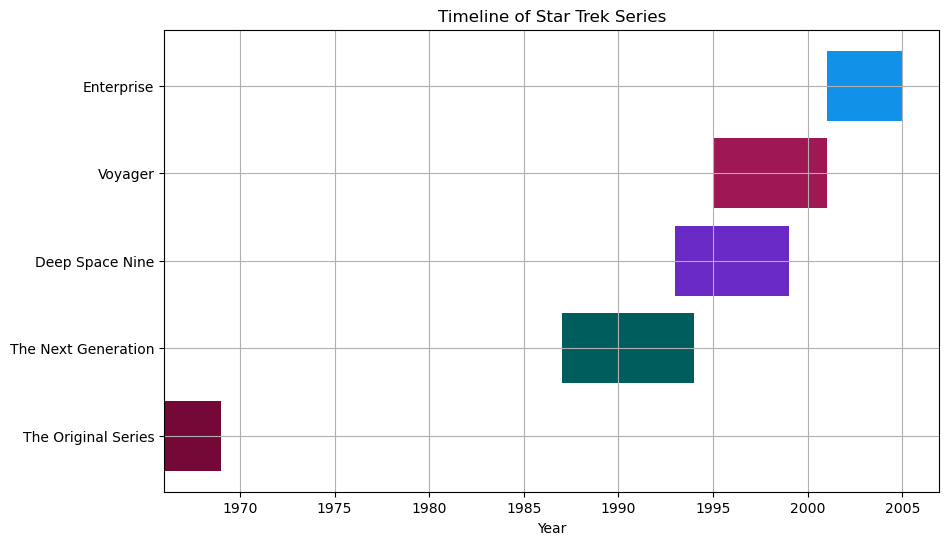

In [12]:
# Finally, I decided to create a timeline using matplotlib.

import matplotlib.pyplot as plt

# Define the series and their start and end years, and color to match charts in Cognos
series = [
    ('The Original Series', 1966, 1969, '#740937'),
    ('The Next Generation', 1987, 1994, '#005D5D'),
    ('Deep Space Nine', 1993, 1999, '#6929C4'),
    ('Voyager', 1995, 2001, '#9F1853'),
    ('Enterprise', 2001, 2005, '#1192E8'),
    
]

# Extract data for plotting
names = [s[0] for s in series]
start_years = [s[1] for s in series]
end_years = [s[2] for s in series]
colors = [s[3] for s in series]
durations = [end - start for start, end in zip(start_years, end_years)]

# Create the figure and the barh chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(names, durations, left=start_years, color=colors)

# Add labels and grid
ax.set_xlabel('Year')
ax.set_title('Timeline of Star Trek Series')
ax.grid(True)

# Show the plot
plt.show()
